In [1]:
import data_loader as dl

# Указание пути к CSV-файлу
file_path = '/Users/lubovsoldatenko/DataspellProjects/datascience/HW4/data/Traffic.csv'

# Загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

Файл /Users/lubovsoldatenko/DataspellProjects/datascience/HW4/data/Traffic.csv успешно загружен.


In [2]:
# Просмотр данных
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [4]:
# Базовая статистика
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [5]:
# Количество значений в датасете
len(df)

2976

In [6]:
from HW4.data_analyzer import MissingValuesHandler

# Создаем объект обработчика
handler = MissingValuesHandler(df)

# Подсчет пропущенных значений
handler.count_missing_values()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [7]:
# Отчет о пропущенных данных
handler.missing_values_report()


 Отчет о пропущенных значениях:
                   Missing Values  Missing Percentage
Time                            0                 0.0
Date                            0                 0.0
Day of the week                 0                 0.0
CarCount                        0                 0.0
BikeCount                       0                 0.0
BusCount                        0                 0.0
TruckCount                      0                 0.0
Total                           0                 0.0
Traffic Situation               0                 0.0


In [8]:
# Поиск дубликатов
handler.find_duplicates()


 Найдено 0 дубликатов.


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation


Данные без пропусков и дубликатов

In [9]:
# Проверка, количесва данных в каждом классе, чтобы понять, насколько сбалансирован датасет
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

Датасет несбалансированный


In [10]:
# Балансировка данных
# Определяем целевой столбец
target_column = 'Traffic Situation'

# Балансируем, оставляя ровно 304 элемента в каждом классе
df_balanced = df.groupby(target_column).sample(n=304, random_state=42)

# Проверяем результат
print(df_balanced[target_column].value_counts())

Traffic Situation
heavy     304
high      304
low       304
normal    304
Name: count, dtype: int64


Визуализация

In [11]:
# Преобразование времени в datetime
import pandas as pd
df_balanced['Time'] = pd.to_datetime(df_balanced['Time'])

/var/folders/91/pkfxltzd5fd66hd8w6yxgpb40000gn/T/ipykernel_67064/2965304464.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_balanced['Time'] = pd.to_datetime(df_balanced['Time'])


In [12]:
# Группировка данных по часам
df_balanced['Hour'] = df_balanced['Time'].dt.hour

# Суммирование по каждому виду транспорта для каждого часа
hourly_traffic = df_balanced.groupby('Hour')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum().reset_index()


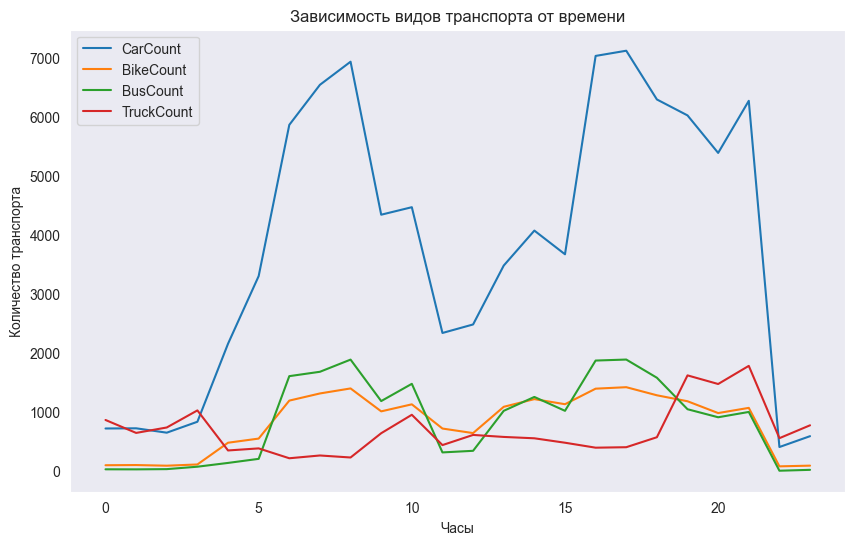

In [13]:
# Построение линейных графиков для каждого вида транспорта в зависимости от времени
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for column in ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']:
    plt.plot(hourly_traffic['Hour'], hourly_traffic[column], label=column)

# Оформление графика
plt.title('Зависимость видов транспорта от времени')
plt.xlabel('Часы')
plt.ylabel('Количество транспорта')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Кодирование категориальных признаков
df_balanced['Time'] = df_balanced['Time'].astype('category').cat.codes
df_balanced['Traffic Situation'] = df_balanced['Traffic Situation'].astype('category').cat.codes
df_balanced['Day of the week'] = df_balanced['Day of the week'].astype('category').cat.codes
df_balanced['Hour'] = df_balanced['Hour'].astype('category').cat.codes

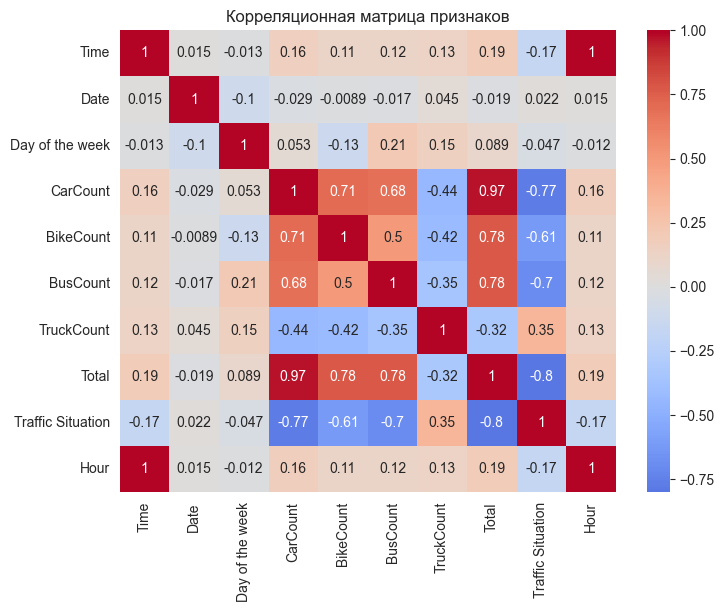

In [15]:
# Матрица корреляций
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

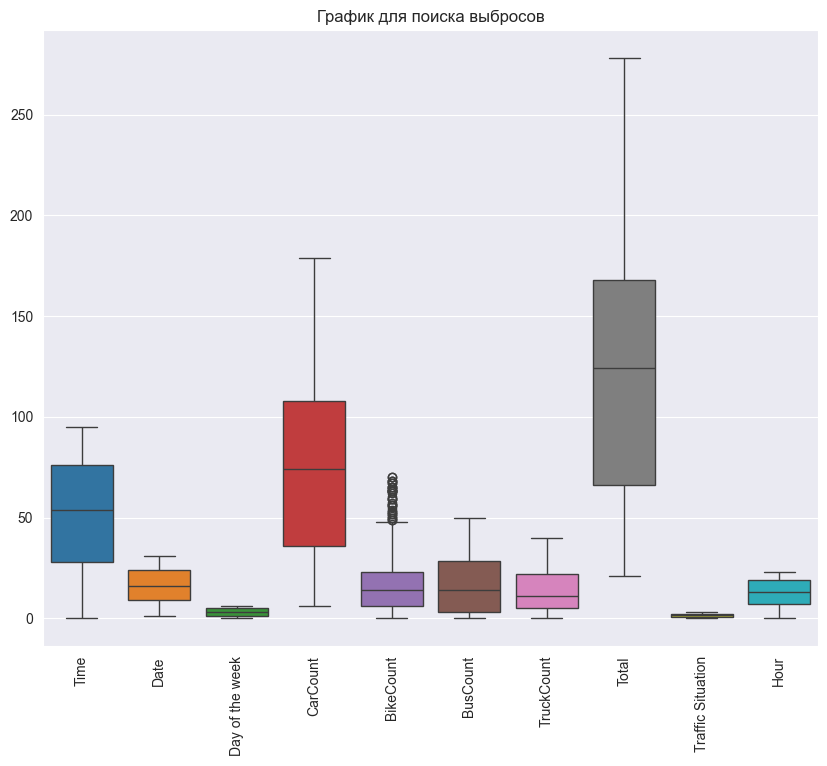

In [16]:
# Ящик с усами
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_balanced)
plt.xticks(rotation=90)
plt.title('График для поиска выбросов')
plt.show()

Из визуализации видно, что в датасете присутствуют выбросы

In [17]:
# Поиск выбросов для параметра BikeCount
Q1 = df_balanced['BikeCount'].quantile(0.25)
Q3 = df_balanced['BikeCount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_balanced[(df_balanced['BikeCount'] < lower_bound) | (df_balanced['BikeCount'] > upper_bound)]
print(f'Найдено {len(outliers)} выбросов')


Найдено 37 выбросов


In [18]:
# Удаляем выбросы из набора данных
df_balanced = df_balanced[(df_balanced['BikeCount'] >= lower_bound) & (df_balanced['BikeCount'] <= upper_bound)]
print(f'Очищенный набор данных содержит {len(df_balanced)} записей')

Очищенный набор данных содержит 1179 записей


Преобразование признаков

In [19]:
from sklearn.preprocessing import StandardScaler

# Стандартизация
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(df_balanced)
print("Standard scaled:\n", X_standard)

Standard scaled:
 [[ 0.48315765  0.78137817 -1.06705711 ...  0.97828265 -1.40272504
   0.53823348]
 [ 0.51946839 -0.01367966 -1.06705711 ...  1.4800447  -1.40272504
   0.53823348]
 [ 0.59208987  0.32705941  0.41359452 ...  1.3070233  -1.40272504
   0.53823348]
 ...
 [-1.22344707  1.12211724  0.41359452 ...  0.33810348  1.31736184
  -1.20670862]
 [ 0.77364356  1.57643601 -1.06705711 ...  0.78795911  1.31736184
   0.82905717]
 [ 1.39092612  1.46285632 -0.07995603 ... -1.16718269  1.31736184
   1.41070453]]


Выбор признаков


In [20]:
from sklearn.model_selection import train_test_split

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделяем на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA F-тест
k = 3  # Количество признаков для отбора
selector = SelectKBest(score_func=f_classif, k=k)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Получение имен выбранных признаков
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print(f"\nОтобранные признаки с помощью SelectKBest (k={k}):")
print(selected_feature_names.tolist())


Отобранные признаки с помощью SelectKBest (k=3):
['CarCount', 'BusCount', 'Total']


Классификатор градиентного бустинга (Gradient Boosting Classifier)

In [22]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

# Обучение модели на обучающем наборе данных
gb_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = gb_classifier.predict(X_test)

# Оценка производительности модели
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gb}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9491525423728814
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.86      1.00      0.92       104
           2       1.00      1.00      1.00        85
           3       1.00      0.79      0.88        84

    accuracy                           0.95       354
   macro avg       0.96      0.95      0.95       354
weighted avg       0.96      0.95      0.95       354

Confusion Matrix:
[[ 81   0   0   0]
 [  0 104   0   0]
 [  0   0  85   0]
 [  1  17   0  66]]


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Классификатор Extra Trees (Extremely Randomized Trees)

In [24]:
# Импортируем необходимые библиотеки
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение классификатора Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Оценка производительности модели
accuracy_extra_trees = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_extra_trees}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.961864406779661
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.96      0.99      0.97        68
           2       0.97      1.00      0.98        59
           3       0.98      0.88      0.93        58

    accuracy                           0.96       236
   macro avg       0.96      0.96      0.96       236
weighted avg       0.96      0.96      0.96       236

Confusion Matrix:
[[50  1  0  0]
 [ 0 67  0  1]
 [ 0  0 59  0]
 [ 3  2  2 51]]


Квадратичный дискриминантный анализ (Quadratic Discriminant Analysis, QDA)

In [25]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Обучение модели на обучающем наборе данных
qda_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = qda_classifier.predict(X_test)

# Оценка производительности модели
accuracy_qda = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_qda}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7923728813559322
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.88      0.66      0.76        68
           2       0.91      0.83      0.87        59
           3       0.63      0.78      0.70        58

    accuracy                           0.79       236
   macro avg       0.81      0.80      0.80       236
weighted avg       0.81      0.79      0.79       236

Confusion Matrix:
[[48  2  0  1]
 [ 8 45  0 15]
 [ 0  0 49 10]
 [ 4  4  5 45]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The cova

K Nearest Neighbors (K-ближайших соседей)

In [26]:
# Импортируем необходимые библиотеки
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка гиперпараметра k с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Вывод лучшего значения k
print("Лучшее значение k:", knn_cv.best_params_['n_neighbors'])

# Обучение модели с лучшим значением k
knn_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_best.predict(X_test)

# Оценка производительности модели
accuracy_knn_best = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn_best}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Лучшее значение k: 1
Accuracy: 0.885593220338983
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.90      0.94      0.92        68
           2       0.94      0.81      0.87        59
           3       0.77      0.83      0.80        58

    accuracy                           0.89       236
   macro avg       0.89      0.89      0.89       236
weighted avg       0.89      0.89      0.89       236

Confusion Matrix:
[[49  1  0  1]
 [ 2 64  0  2]
 [ 0  0 48 11]
 [ 1  6  3 48]]


Классификатор CatBoost

In [27]:
# Импортируем необходимые библиотеки
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Разделяем на признаки (X) и целевую переменную (y)
X = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели CatBoostClassifier
clf = CatBoostClassifier(iterations=50, depth=10, learning_rate=0.2, loss_function='MultiClass', random_state=42)

# Обучение модели на обучающем наборе данных
clf.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = clf.predict(X_test)

# Оценка производительности модели
accuracy_catboost = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_catboost}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0:	learn: 1.0537602	total: 94.8ms	remaining: 4.64s
1:	learn: 0.8314070	total: 111ms	remaining: 2.66s
2:	learn: 0.7065746	total: 125ms	remaining: 1.96s
3:	learn: 0.5952495	total: 139ms	remaining: 1.6s
4:	learn: 0.5130279	total: 153ms	remaining: 1.38s
5:	learn: 0.4583044	total: 168ms	remaining: 1.23s
6:	learn: 0.4028649	total: 181ms	remaining: 1.11s
7:	learn: 0.3658456	total: 195ms	remaining: 1.02s
8:	learn: 0.3201470	total: 209ms	remaining: 954ms
9:	learn: 0.2804601	total: 225ms	remaining: 900ms
10:	learn: 0.2474523	total: 241ms	remaining: 855ms
11:	learn: 0.2239680	total: 256ms	remaining: 811ms
12:	learn: 0.2068580	total: 271ms	remaining: 770ms
13:	learn: 0.1860508	total: 281ms	remaining: 722ms
14:	learn: 0.1709717	total: 290ms	remaining: 677ms
15:	learn: 0.1566731	total: 300ms	remaining: 638ms
16:	learn: 0.1435272	total: 310ms	remaining: 602ms
17:	learn: 0.1342975	total: 319ms	remaining: 568ms
18:	learn: 0.1273790	total: 329ms	remaining: 537ms
19:	learn: 0.1164457	total: 338ms	remaini

Классификатор LogisticRegression

In [28]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создание новых признаков
# Статистические признаки (среднее, медиана, стандартное отклонение)
X["mean"] = X.mean(axis=1)
X["std"] = X.std(axis=1)
X["median"] = X.median(axis=1)

# Объединяем новые признаки
X_new = np.hstack(X[["mean", "std", "median"]].values)

# Разделяем на признаки (X) и целевую переменную (y)
X_new = df_balanced.drop(columns=["Traffic Situation"])
y = df_balanced["Traffic Situation"]

# Разделение данных на обучающий и тестовый наборы
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Стандартизируем данные (масштабируем признаки)
scaler = StandardScaler()
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

# Создадим и обучим модель логистической регрессии
model = LogisticRegression(
    random_state=42,
    solver='lbfgs',
    max_iter=200
)
model.fit(X_new_train_scaled, y_train)

# Сделаем предсказания на тестовом наборе данных
y_pred = model.predict(X_new_test_scaled)

# Оценка производительности модели
accuracy_LogisticRegression = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_LogisticRegression}")

# Вывод полного отчета
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8700564971751412
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        81
           1       0.88      0.88      0.88       104
           2       0.90      0.88      0.89        85
           3       0.81      0.77      0.79        84

    accuracy                           0.87       354
   macro avg       0.87      0.87      0.87       354
weighted avg       0.87      0.87      0.87       354

Confusion Matrix:
[[76  5  0  0]
 [ 7 92  0  5]
 [ 0  0 75 10]
 [ 4  7  8 65]]


Сравнение классификаторов

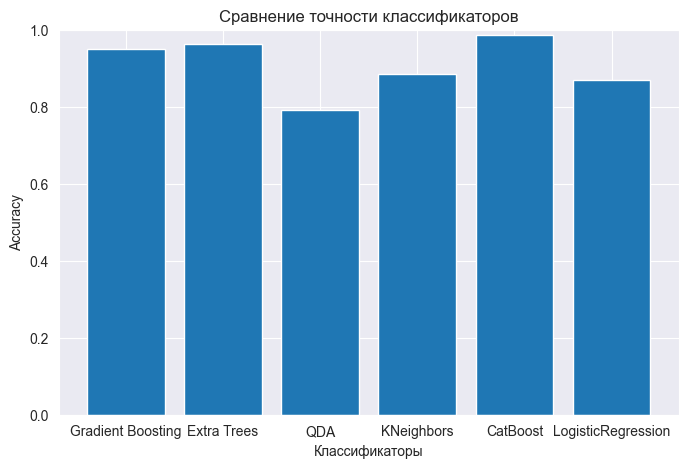

In [29]:
import matplotlib.pyplot as plt

# Создаем список классификаторов
classifiers_names = ["Gradient Boosting", "Extra Trees", "QDA", "KNeighbors", "CatBoost", "LogisticRegression"]
accuracies = [accuracy_gb, accuracy_extra_trees, accuracy_qda, accuracy_knn_best, accuracy_catboost, accuracy_LogisticRegression]

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(classifiers_names, accuracies)
plt.xlabel("Классификаторы")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Ограничиваем диапазон
plt.title("Сравнение точности классификаторов")
plt.show()


Из графика можно сделать вывод, что лучше справился классификатор CatBoost.